In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df =  pd.read_csv('/content/drive/MyDrive/dataset/weatherHistory.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.shape

(96453, 12)

In [6]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [8]:
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [9]:
df.tail(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [10]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [13]:
df.duplicated().sum()

np.int64(24)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['Summary'].value_counts()

,count
Summary,
Partly Cloudy,31628
Mostly Cloudy,27914
Overcast,16516
Clear,10746
Foggy,7117
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


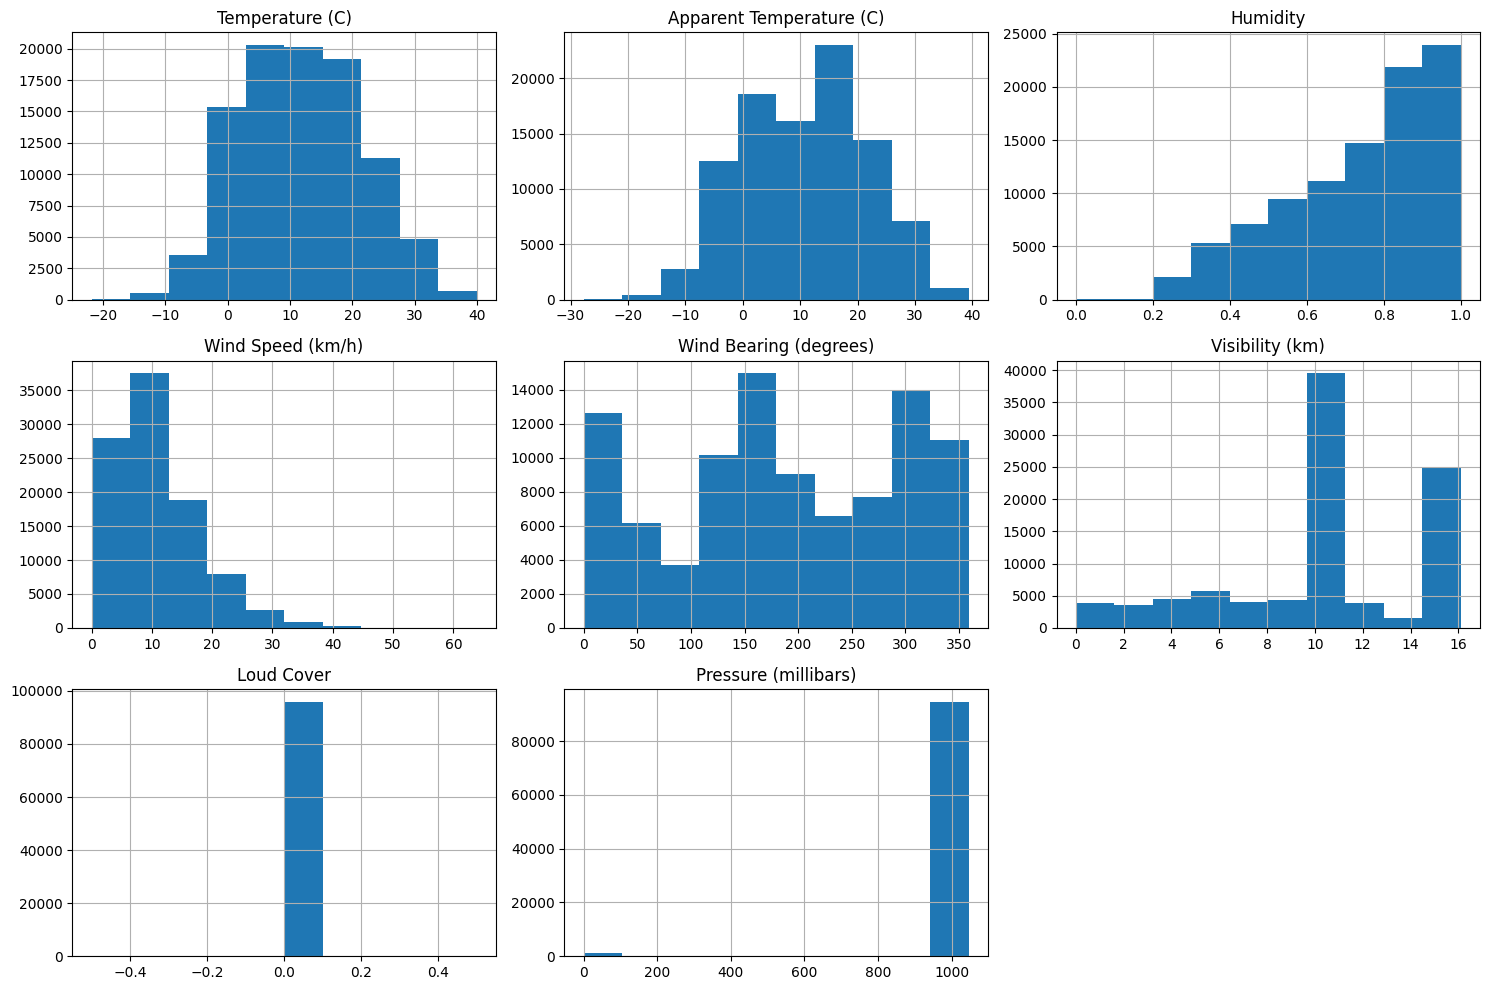

In [17]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

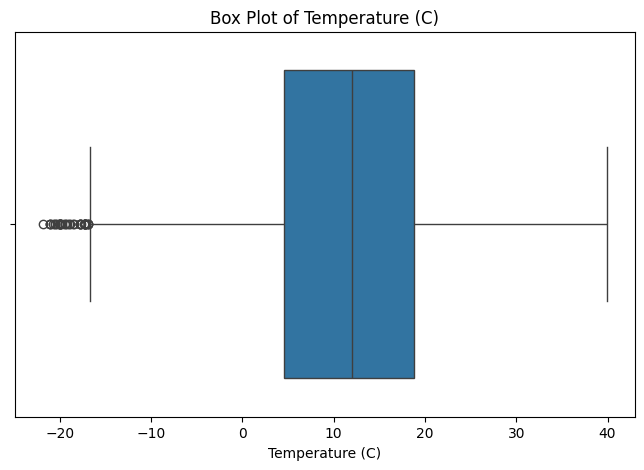

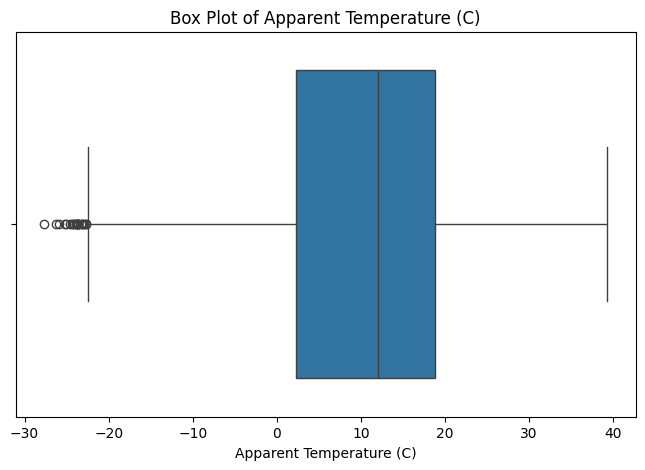

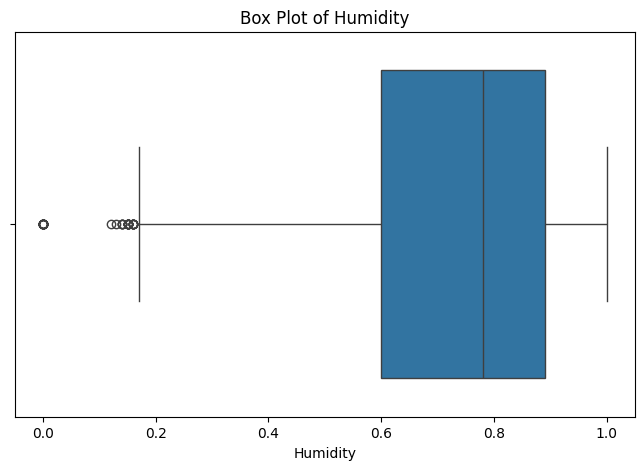

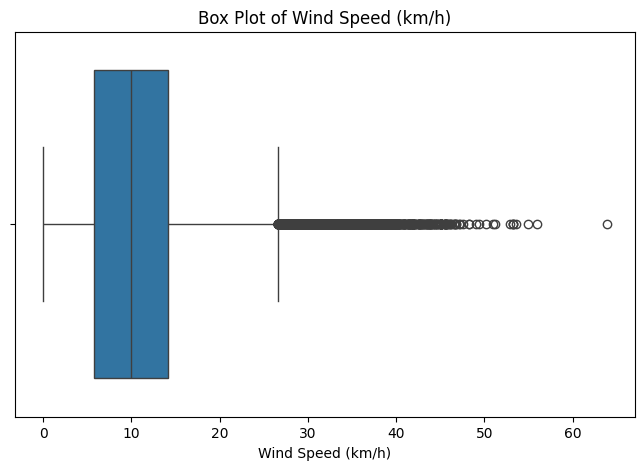

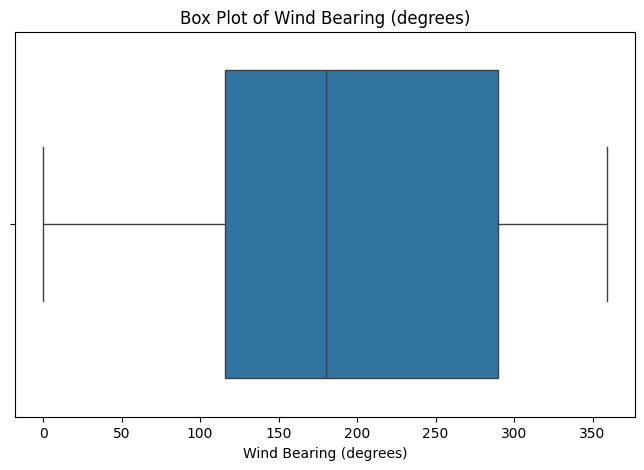

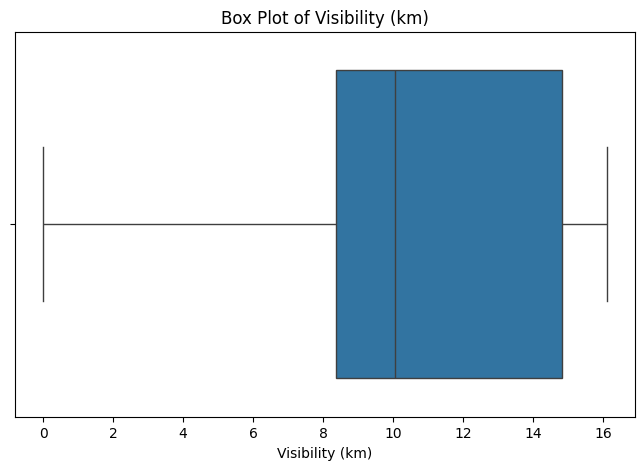

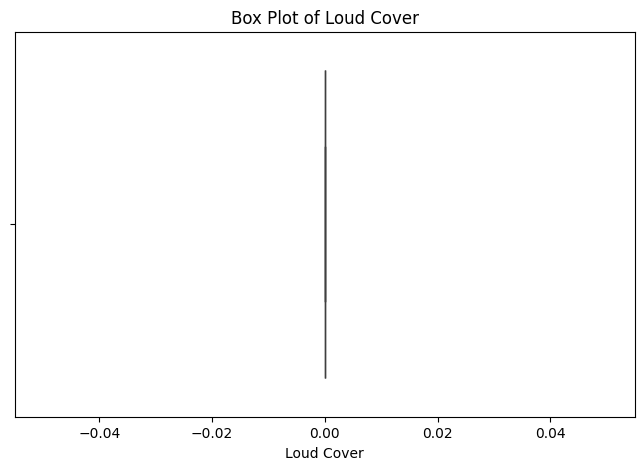

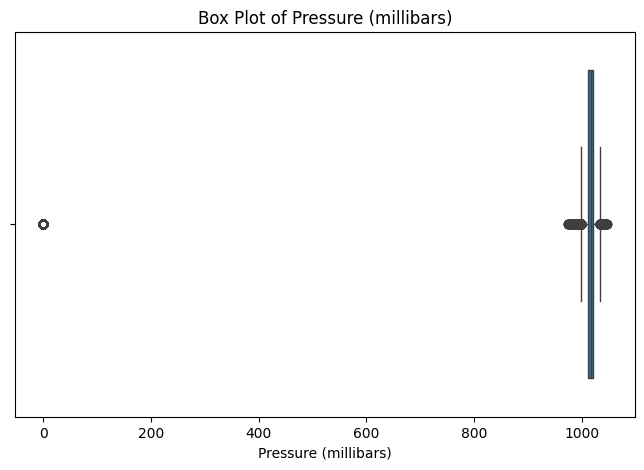

In [18]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

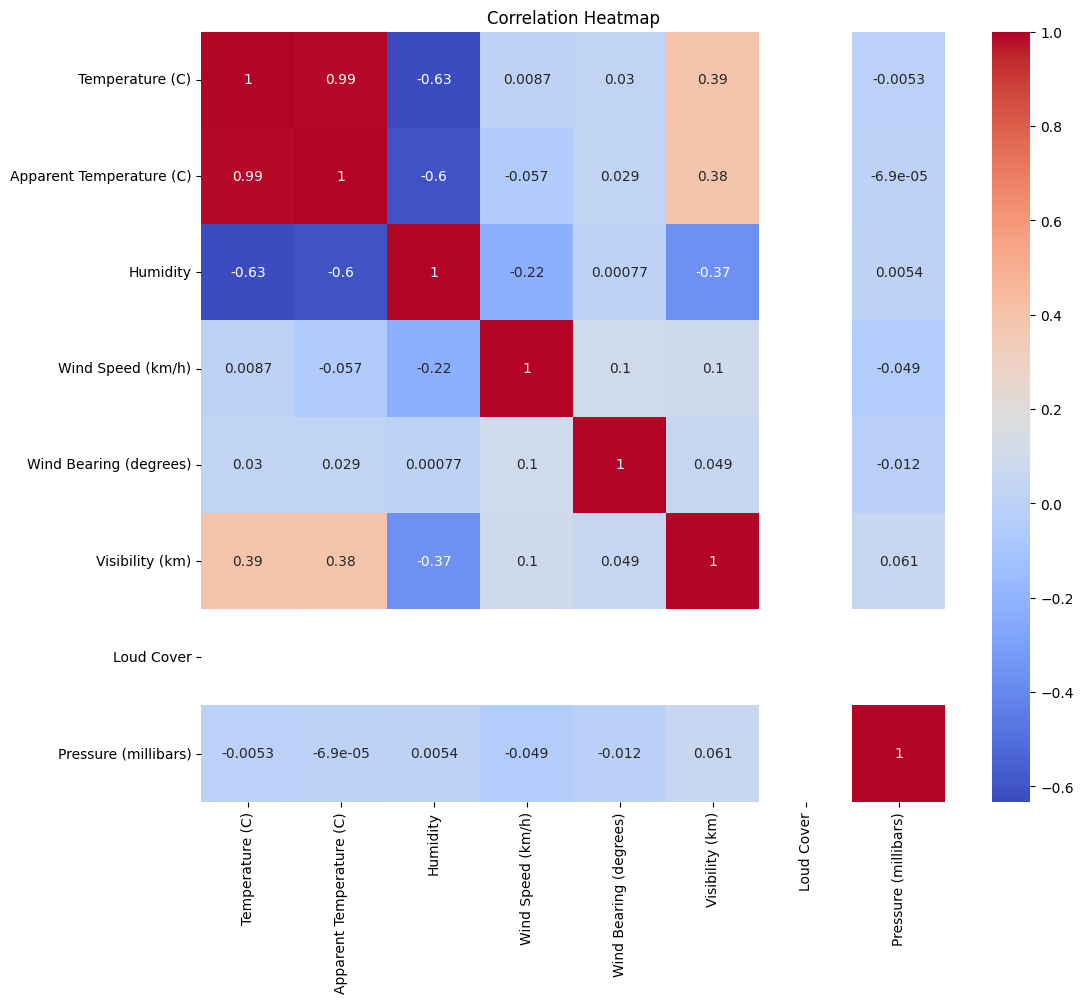

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

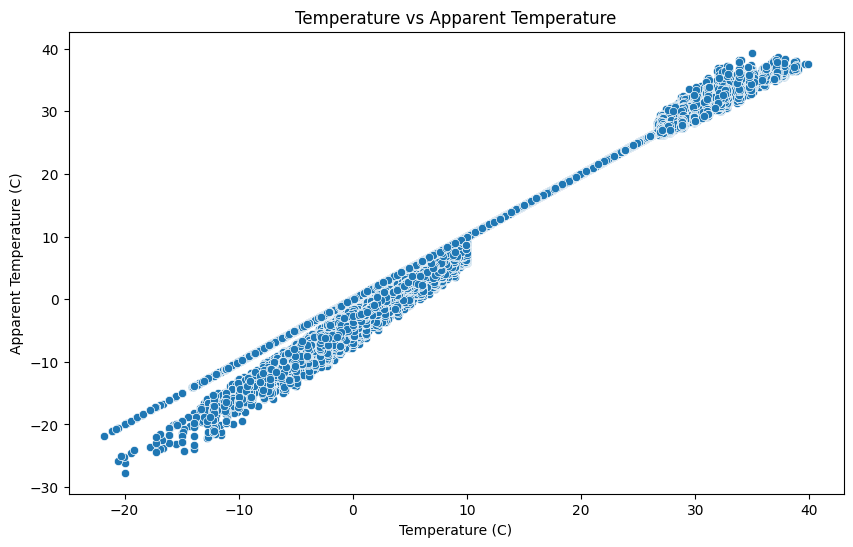

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (C)', y='Apparent Temperature (C)', data=df)
plt.title('Temperature vs Apparent Temperature')
plt.show()

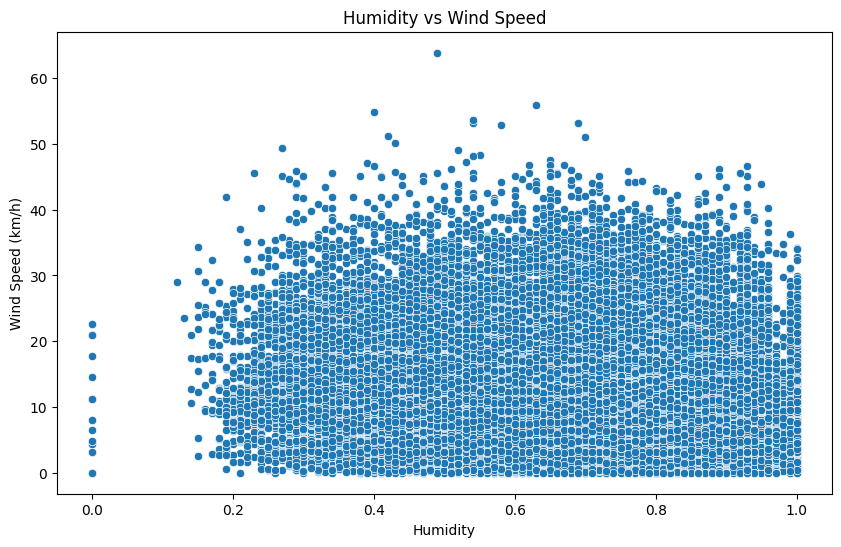

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='Wind Speed (km/h)', data=df)
plt.title('Humidity vs Wind Speed')
plt.show()

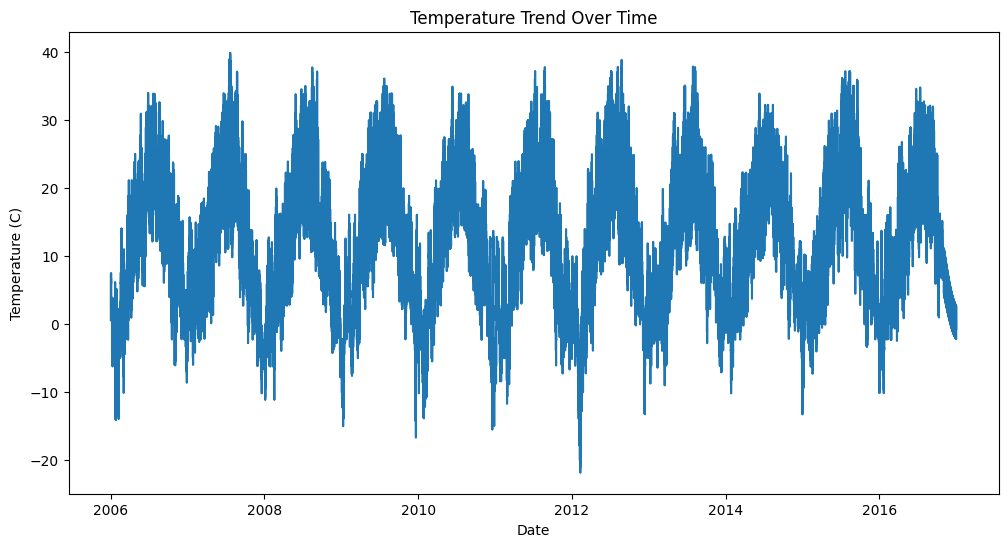

In [22]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Formatted Date', y='Temperature (C)', data=df)
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

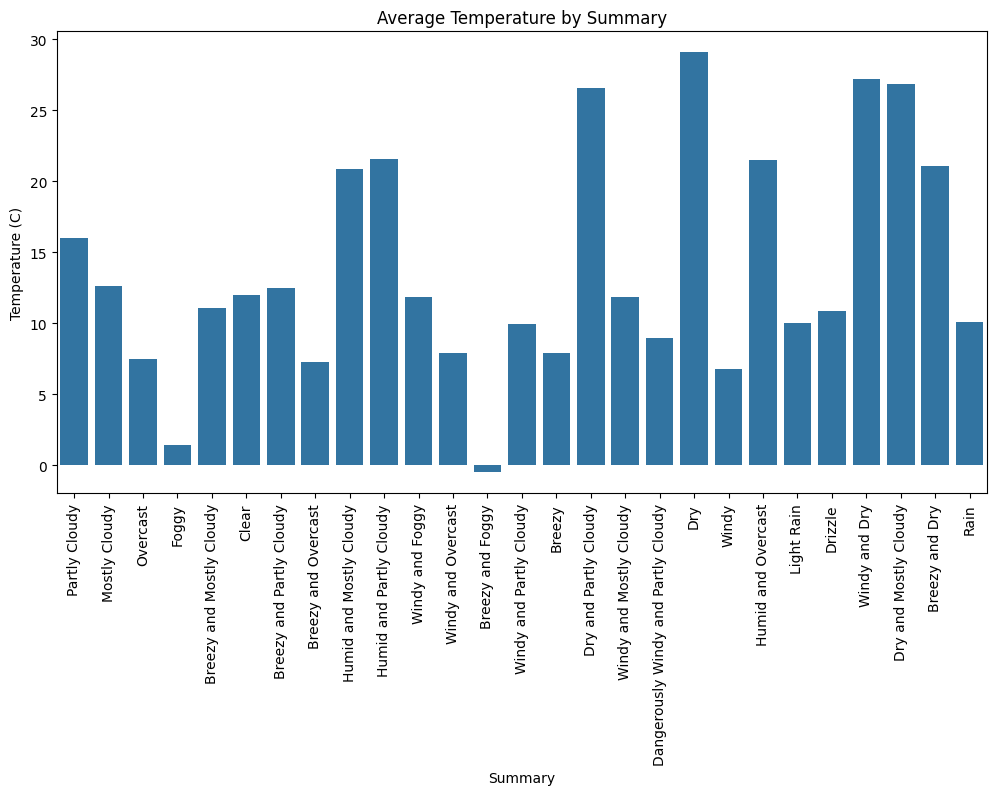

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Summary', y='Temperature (C)', data=df, errorbar=None)
plt.title('Average Temperature by Summary')
plt.xticks(rotation=90)
plt.show()

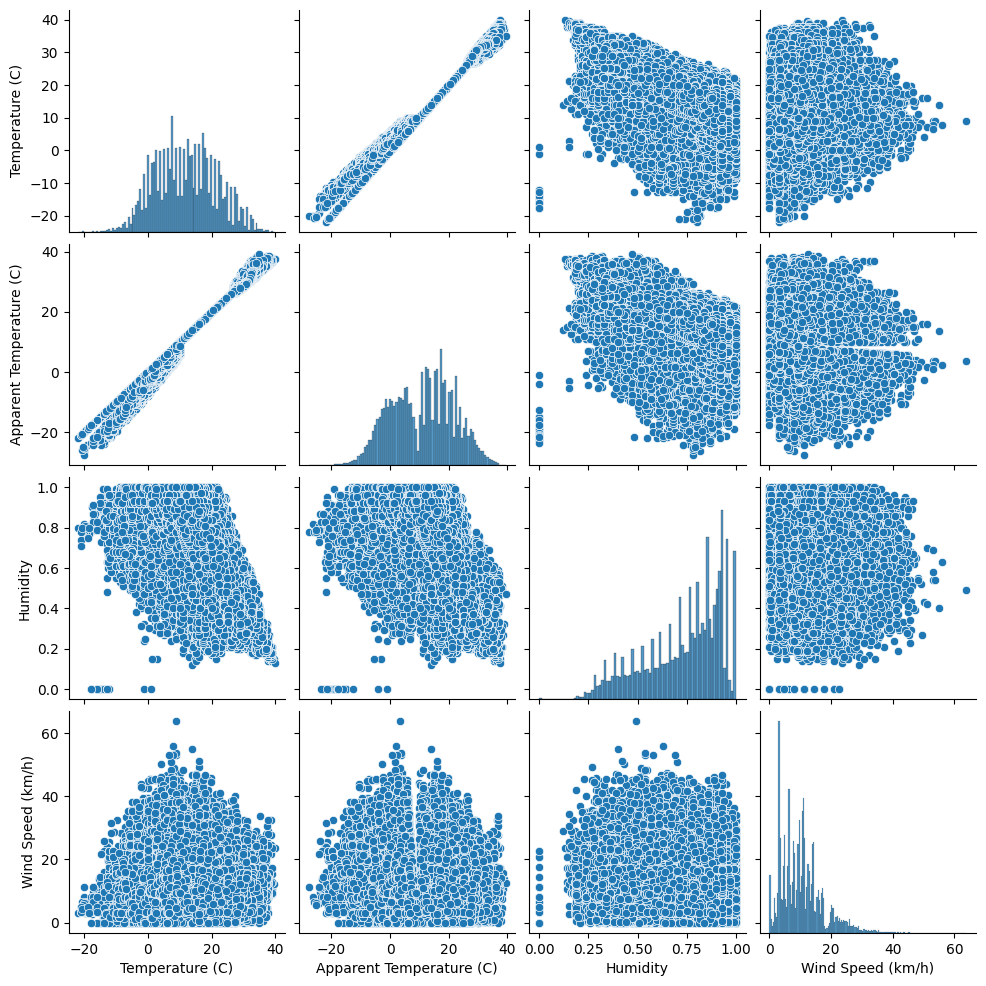

In [24]:
numerical_subset = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
sns.pairplot(numerical_subset)
plt.show()

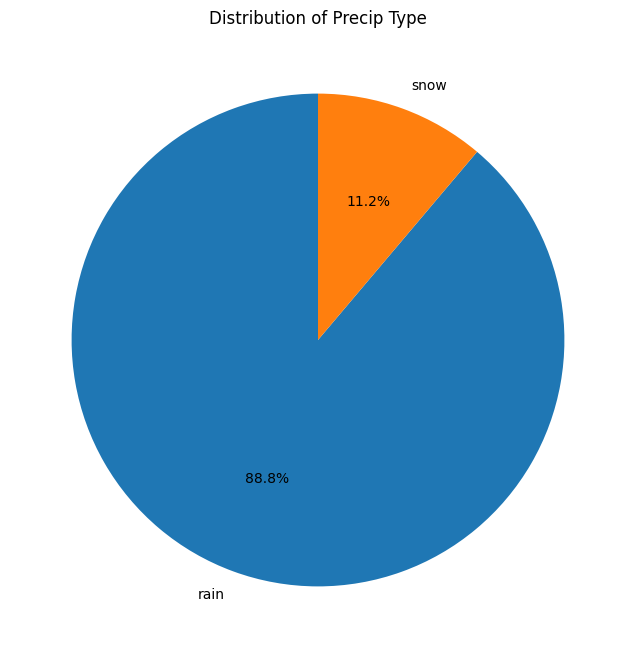

In [25]:
if 'Precip Type' in df.columns and df['Precip Type'].nunique() <= 5:
    plt.figure(figsize=(8, 8))
    df['Precip Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Precip Type')
    plt.ylabel('')
    plt.show()
else:
    print("Pie chart not suitable for 'Precip Type' due to too many unique values or column not found.")

In [27]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

df['Year'] = df['Formatted Date'].dt.year
df['DayOfWeek'] = df['Formatted Date'].dt.dayofweek
df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

df['Hour'] = df['Formatted Date'].dt.hour
df['Month'] = df['Formatted Date'].dt.month
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df.drop(['Hour', 'Month'], axis=1, inplace=True)

df['Humidity_Level'] = pd.cut(df['Humidity'], bins=[0, 0.3, 0.6, 1.0], labels=['Low', 'Medium', 'High'])
df['Humidity_Level'] = df['Humidity_Level'].astype(str).replace('nan', 'Unknown')
df['Humidity_Level'] = LabelEncoder().fit_transform(df['Humidity_Level'])

df['Temp_Humidity_Pressure'] = df['Temperature (C)'] * df['Humidity'] * df['Pressure (millibars)']
df['Temp_Humidity_Visibility'] = df['Temperature (C)'] * df['Humidity'] * df['Visibility (km)']
df['Wind_Speed_Temp'] = df['Wind Speed (km/h)'] * df['Temperature (C)']
df['Wind_Speed_Temp_Humidity'] = df['Wind Speed (km/h)'] * df['Temperature (C)'] * df['Humidity']
df['Wind_Speed_Temp_Visibility'] = df['Wind Speed (km/h)'] * df['Temperature (C)'] * df['Visibility (km)']

df.drop('Formatted Date', axis=1, inplace=True)


In [28]:
df.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),...,Hour_sin,Hour_cos,Month_sin,Month_cos,Humidity_Level,Temp_Humidity_Pressure,Temp_Humidity_Visibility,Wind_Speed_Temp,Wind_Speed_Temp_Humidity,Wind_Speed_Temp_Visibility
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,...,-0.500000,0.866025,1.000000,6.123234e-17,0,8557.827881,133.420105,133.744936,119.032993,2116.687482
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,...,-0.258819,0.965926,1.000000,6.123234e-17,0,8171.533284,127.334893,133.453258,114.769802,2112.071294
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,...,0.000000,1.000000,0.866025,-5.000000e-01,0,8479.261004,124.833611,36.839662,32.787299,551.007144


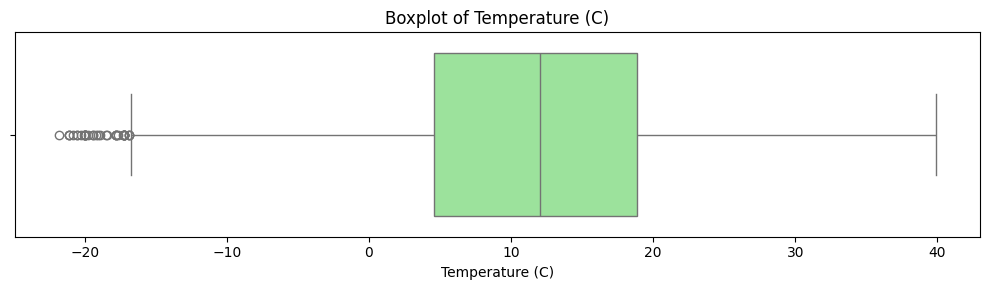

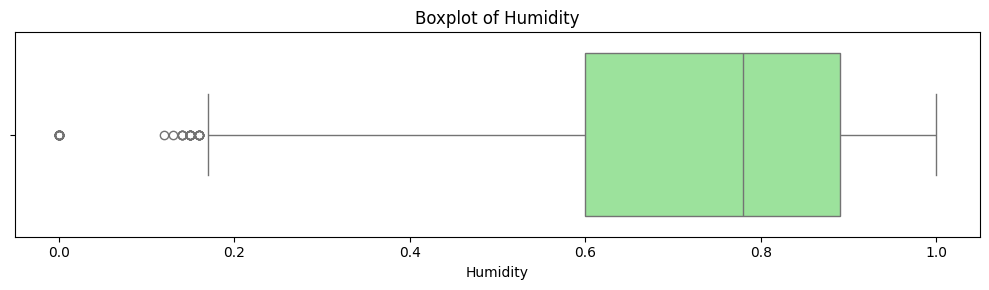

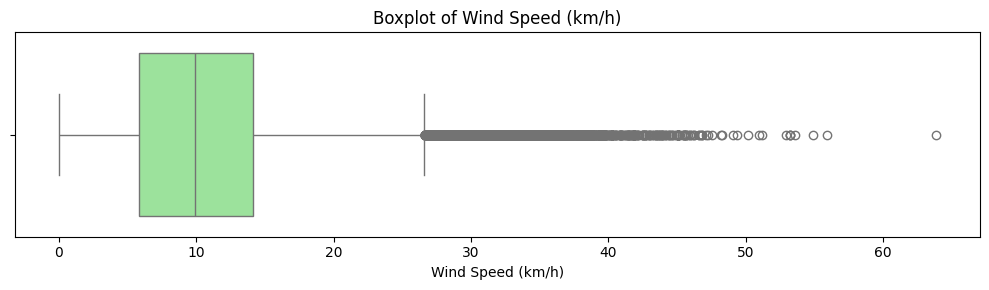

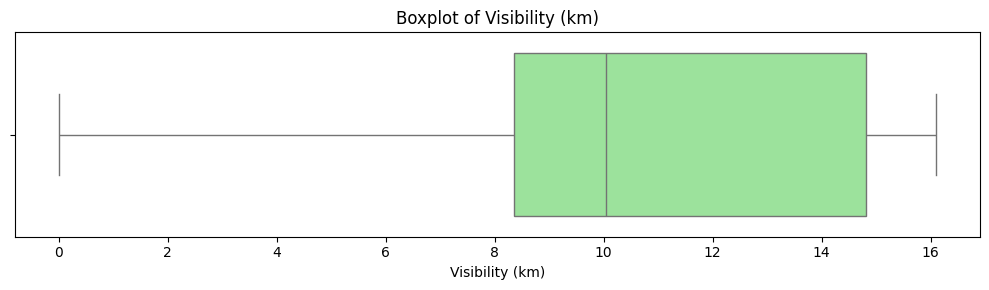

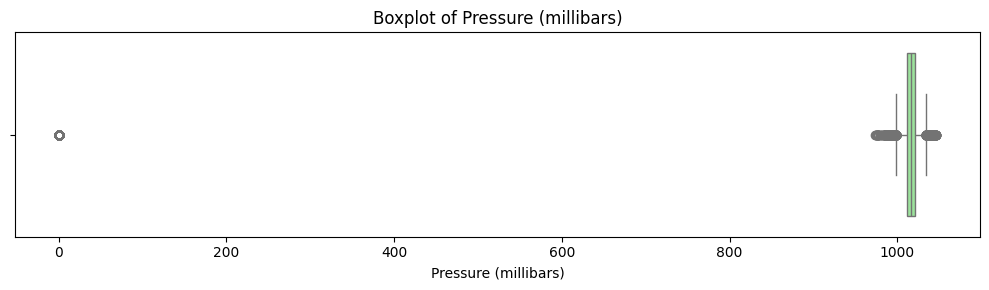

In [29]:
numerical_cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
for col in numerical_cols:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [30]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

for col in numerical_cols:
    df = remove_outliers_iqr(df, col)


In [31]:
df['Precip Type'].fillna('none', inplace=True)

le_summary = LabelEncoder()
df['Summary_encoded'] = le_summary.fit_transform(df['Summary'])

le_precip = LabelEncoder()
df['Precip_Type_encoded'] = le_precip.fit_transform(df['Precip Type'])

le_target = LabelEncoder()
df['Daily_Summary_encoded'] = le_target.fit_transform(df['Daily Summary'])

df.drop(['Summary', 'Precip Type', 'Daily Summary'], axis=1, inplace=True)


In [32]:
x = df.drop('Daily_Summary_encoded', axis=1)
y = df['Daily_Summary_encoded']

In [33]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
def evaluate_model(name, model, x_test, y_test):
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    precision = precision_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')

    print(f"Metrics for {name}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("------------------------")
    print(classification_report(y_test, predictions))
    print("------------------------")

    return {
        "Model": name,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    }

In [36]:
metrics = []

In [37]:
pipeline_lg = Pipeline([('LogisticRegression', LogisticRegression())])
pipeline_lg.fit(x_train, y_train)
metrics.append(evaluate_model("LogisticRegression (Before Tuning)", pipeline_lg, x_test, y_test))

Metrics for LogisticRegression (Before Tuning)
Accuracy : 0.2928
Recall   : 0.0877
Precision: 0.1267
F1 Score : 0.0898
------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.60      1.00      0.75         3
           2       0.50      0.33      0.40         6
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         3
           6       0.33      0.20      0.25         5
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         6
          11       1.00      0.60      0.75         5
          12       0.50      0.20      0.29         5
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00  

In [38]:
pipeline_dt = Pipeline([('DecisionTreeClassifier', DecisionTreeClassifier())])
pipeline_dt.fit(x_train, y_train)
metrics.append(evaluate_model("DecisionTreeClassifier (Before Tuning)", pipeline_dt, x_test, y_test))

Metrics for DecisionTreeClassifier (Before Tuning)
Accuracy : 0.5837
Recall   : 0.4584
Precision: 0.4595
F1 Score : 0.4354
------------------------
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.67      0.57         3
           2       0.17      0.17      0.17         6
           3       0.33      0.50      0.40         2
           4       0.67      1.00      0.80         2
           5       1.00      0.33      0.50         3
           6       0.33      0.40      0.36         5
           7       0.50      0.23      0.32        13
           8       0.67      1.00      0.80         4
           9       0.33      1.00      0.50         1
          10       0.67      0.67      0.67         6
          11       0.50      0.40      0.44         5
          12       1.00      0.20      0.33         5
          13       0.67      0.50      0.57         4
          14       0.33      1.00      0.

In [39]:
pipeline_knn = Pipeline([('KNeighborsClassifier', KNeighborsClassifier())])
pipeline_knn.fit(x_train, y_train)
metrics.append(evaluate_model("KNeighborsClassifier (Before Tuning)", pipeline_knn, x_test, y_test))

Metrics for KNeighborsClassifier (Before Tuning)
Accuracy : 0.5527
Recall   : 0.4349
Precision: 0.4912
F1 Score : 0.4416
------------------------
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3
           2       0.38      0.50      0.43         6
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         3
           6       0.50      0.60      0.55         5
           7       0.69      0.85      0.76        13
           8       0.50      0.50      0.50         4
           9       0.00      0.00      0.00         1
          10       1.00      0.17      0.29         6
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      0.75      0.86         4
          14       0.00      0.00      0.00

In [40]:
pipeline_rf = Pipeline([('RandomForestClassifier', RandomForestClassifier())])
pipeline_rf.fit(x_train, y_train)
metrics.append(evaluate_model("RandomForestClassifier (Before Tuning)", pipeline_rf, x_test, y_test))

Metrics for RandomForestClassifier (Before Tuning)
Accuracy : 0.7014
Recall   : 0.5621
Precision: 0.7587
F1 Score : 0.6222
------------------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.60      1.00      0.75         3
           2       1.00      0.50      0.67         6
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         3
           6       1.00      0.80      0.89         5
           7       1.00      0.54      0.70        13
           8       1.00      0.50      0.67         4
           9       0.50      1.00      0.67         1
          10       1.00      0.33      0.50         6
          11       0.80      0.80      0.80         5
          12       1.00      0.80      0.89         5
          13       1.00      0.75      0.86         4
          14       0.00      0.00      0.

In [41]:
pipeline_svm = Pipeline([('SVC', SVC())])
pipeline_svm.fit(x_train, y_train)
metrics.append(evaluate_model("SVC (Before Tuning)", pipeline_svm, x_test, y_test))

Metrics for SVC (Before Tuning)
Accuracy : 0.3791
Recall   : 0.0984
Precision: 0.2426
F1 Score : 0.1205
------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.67      0.67         3
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         6
          11       1.00      0.60      0.75         5
          12       1.00      0.20      0.33         5
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
      

In [42]:
pipeline_gb = Pipeline([('GaussianNB', GaussianNB())])
pipeline_gb.fit(x_train, y_train)
metrics.append(evaluate_model("GaussianNB (Before Tuning)", pipeline_gb, x_test, y_test))

Metrics for GaussianNB (Before Tuning)
Accuracy : 0.0341
Recall   : 0.4809
Precision: 0.1594
F1 Score : 0.1876
------------------------
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         3
           1       0.15      1.00      0.26         3
           2       0.09      1.00      0.16         6
           3       0.50      1.00      0.67         2
           4       0.67      1.00      0.80         2
           5       1.00      0.67      0.80         3
           6       0.12      1.00      0.21         5
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         4
           9       0.20      1.00      0.33         1
          10       0.60      1.00      0.75         6
          11       0.67      0.80      0.73         5
          12       0.71      1.00      0.83         5
          13       0.20      1.00      0.33         4
          14       0.20      1.00      0.33         1

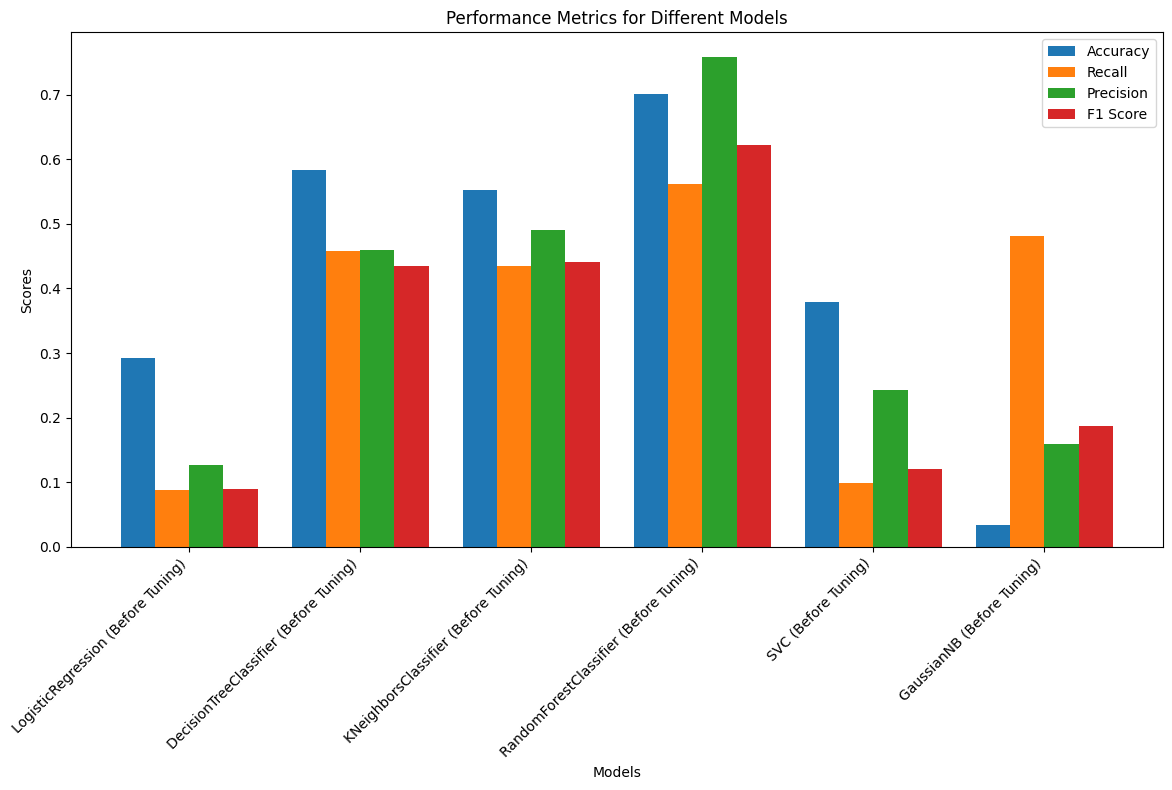

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2
df_metrics = pd.DataFrame(metrics)
bar_positions = [i for i in range(len(df_metrics["Model"]))]

for i, metric in enumerate(["Accuracy", "Recall", "Precision", "F1 Score"]):
    ax.bar([p + bar_width * i for p in bar_positions], df_metrics[metric], width=bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks([p + bar_width * 1.5 for p in bar_positions])
ax.set_xticklabels(df_metrics["Model"], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()